In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


0 : 'low' <br>
1 : 'high'

a row of data corresponds to : $$\mathbf{X}_{j}=\left(X_{1, j}, \ldots, X_{9, j}\right)$$
We assume that each observation is an independent draw from the Bayesian network.

In [19]:
# 'consensus_adj_mat.csv'
adj_mat = pd.read_csv('dataset/consensus_adj_mat.csv')
adj_mat = adj_mat.drop(columns=['Unnamed: 0'])
adj_mat

,Akt,Erk,Jnk,Mek,P38,PIP2,PIP3,PKA,PKC,Plcg,Raf
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,1,0,0,0,1,0
7,1,1,1,1,1,0,0,0,0,0,1
8,0,0,1,1,1,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,1,0,0


In [20]:
# 'sachs_bin.csv'
sachs_bin = pd.read_csv('dataset/sachs_bin.csv')
sachs_bin = sachs_bin.astype(int) # convert to integer

# Convert each columun into a observed data vector:
Akt_obs = sachs_bin['Akt']
Erk_obs = sachs_bin['Erk']
Jnk_obs = sachs_bin['Jnk']
Mek_obs = sachs_bin['Mek']
P38_obs = sachs_bin['P38']
Plcg_obs = sachs_bin['Plcg']
Raf_obs = sachs_bin['Raf']
Mek_Erk_obs = sachs_bin['Mek_Erk']
Plcg_Erk_obs = sachs_bin['Plcg_Erk']

sachs_bin

,Akt,Erk,Jnk,Mek,P38,PIP2,PIP3,PKA,PKC
0,0,0,1,0,1,0,1,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
848,0,0,0,0,0,0,0,0,1
849,0,0,1,0,1,0,1,0,0
850,0,0,0,1,0,0,1,0,0
851,0,0,0,0,1,0,1,0,1


In [21]:


def simulate_data(adjacency_matrix, n_samples=1000, alpha=0.5):
    n_nodes = len(adjacency_matrix)
    data = np.zeros((n_samples, n_nodes), dtype=int)
    
    # Simulate data for each sample
    for i in range(n_samples):
        for j in range(n_nodes):
            parents = adjacency_matrix.index[adjacency_matrix.iloc[:, j] == 1]
            n_parents = len(parents)
            if n_parents == 0:
                # Node without parents, set randomly
                data[i, j] = np.random.choice([0, 1])
            else:
                # Node with parents, calculate probability based on parents' values
                parent_values = data[i, :n_parents]
                prob_success = 1 - alpha ** (1 + np.sum(parent_values))
                data[i, j] = np.random.choice([0, 1], p=[1 - prob_success, prob_success])
    
    return data

# Simulate data
simulated_data = simulate_data(adj_mat)




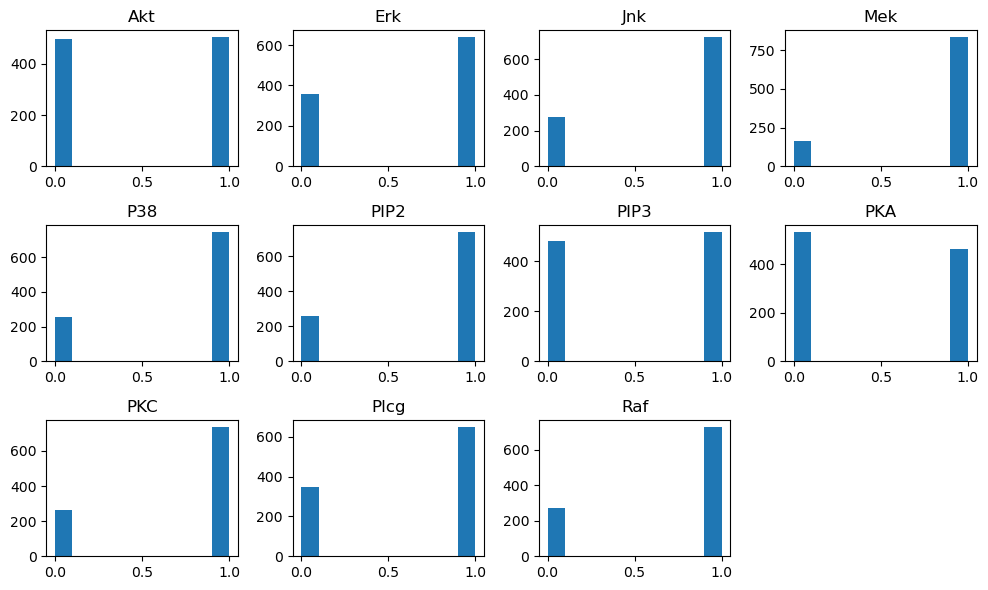

In [22]:
# Plot simulated data
plt.figure(figsize=(10, 6))
for i in range(simulated_data.shape[1]):
    plt.subplot(3, 4, i + 1)
    plt.hist(simulated_data[:, i])
    plt.title(adj_mat.columns[i])
plt.tight_layout()
plt.show()